In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.svm import SVC
from joblib import dump
from joblib import load

In [6]:
from sklearn.metrics import classification_report, accuracy_score
#import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('ocean_data1212.csv')
print(data.columns)


Index(['Hour', 'Temperature (°C)', 'Salinity (ppt)', 'Oxygen levels (mg/L)',
       'pH levels', 'Turbidity (NTU)', 'Fish population'],
      dtype='object')


In [8]:
X = data.drop('Fish population', axis=1)

In [9]:
print(data.columns)

Index(['Hour', 'Temperature (°C)', 'Salinity (ppt)', 'Oxygen levels (mg/L)',
       'pH levels', 'Turbidity (NTU)', 'Fish population'],
      dtype='object')


In [10]:
y = data['Fish population']
print(data.columns)


Index(['Hour', 'Temperature (°C)', 'Salinity (ppt)', 'Oxygen levels (mg/L)',
       'pH levels', 'Turbidity (NTU)', 'Fish population'],
      dtype='object')


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
svm = SVC()
print(y.unique())


['High' 'Low']


In [13]:
svm.fit(X_train, y_train)

SVC()

In [14]:
y_pred = svm.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)

In [16]:
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred, zero_division=0)
#warnings.filterwarnings("ignore", category= UndefinedMetricWarning)
report = classification_report(y_test, y_pred, zero_division=0)

Accuracy: 0.9999322962507747


In [17]:
#print(classification_report(y_test, y_pred))
dump(svm, 'svm_fish_model.joblib')
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [18]:
step = 0.5
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))
meshgrid_data = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()),
                      np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]
Z = svm.predict(meshgrid_data) #Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]) 

Z = Z.reshape(xx.shape)



#cm = confusion_matrix(y_test, y_pred)
#svm.load_model('svm_fish_model.jolib')  # Load the saved model file
#svm = load('svm_fish_model.joblib')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         High
1         High
2         High
3         High
4         High
          ... 
960056     Low
960057     Low
960058     Low
960059     Low
960060     Low
Name: Fish population, Length: 960061, dtype: object

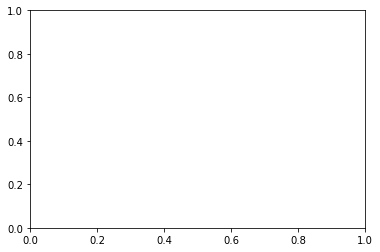

In [19]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')

# Show the plot
plt.show()



#new_test_features = new_test_data.drop('Fish population', axis=1)
#print(data.columns)
#new_test_data = pd.read_csv('fishfactor.csv')
#scaler = StandardScaler()
#svm.fit(X_train, y_train)
#X_test_new_scaled = scaler.transform(X_test_new)

In [ ]:
X_test_new = new_test_data.drop('fish_population', axis=1)  # Adjust the column names as per your data
#scaler = StandardScaler()
X_test_new_scaled = scaler.transform(X_test_new)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
print("Classification Report:\n", report)


In [ ]:
print("Accuracy:", accuracy)



In [47]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [45]:
data = pd.read_csv('dummy_test_cases.csv')

In [46]:
new_test_data = pd.read_csv('dummy_test_cases.csv')
new_test_data.columns = new_test_data.columns.str.strip()



In [47]:
X_new = new_test_data[['Hour','Temperature', 'Salinity', 'Oxygen_levels', 'pH_levels','Turbidity']]

In [48]:
scaler = StandardScaler()


In [49]:
scaler.fit(X_train)  # Assuming X_train is the training data used for scaling


StandardScaler()

In [50]:
X_new_scaled = scaler.transform(X_new)


In [51]:
predictions = svm.predict(X_new_scaled)


In [52]:
print(predictions)


['High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High' 'High']
